# Python Implement of CSCV procedure
## tools including:
* pandas: handy data table manipulation
* numpy: for some numeric usage
* scipy.stat: for regression model
* matplotlib: for data visualization
* seaborn: for more beautiful visualization

In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import scipy.stats as ss
import matplotlib.pylab as plt
import seaborn as sns
import itertools

In [22]:
# Step 1: Collect a matrix M of performance time series from each strategy
m = pd.read_csv('ret.csv', index_col=0, parse_dates=True)
t, n = m.shape

In [23]:
# # Step 1: Collect a matrix M of performance time series from each strategy
# n = 100
# t = 1000
# m = pd.DataFrame(np.random.normal(0, 1, n*t).reshape(t, n)) # generate a return time series form normal distribution
# m.index = pd.bdate_range(start='2000-01-01', periods=t) # row is the business day
# m.columns = 'Strategy' + (m.columns).map(str) # columns is the index of strategy
# m.head()

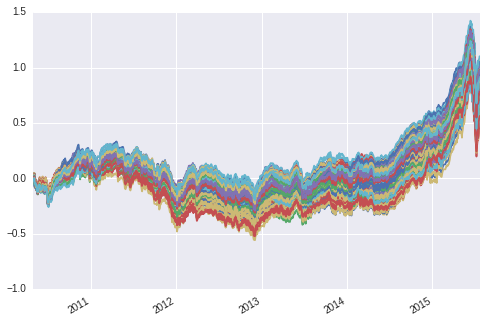

In [16]:
# how's the performance of  the 100 strategies?
m.cumsum().plot(legend=False)

In [25]:
# Step 2: Split M into S=8 disjoint submatrices called Ms
s = 8
size = t/s #size=125
#m.index = m.index.map(lambda x: str(x)[:10]) # for plot
m_part = { idx: m.ix[0+size*(idx-1) :size*idx,]  for idx in range(1, s+1) }
m_part

{1:             Strategy0  Strategy1  Strategy2  Strategy3  Strategy4  Strategy5  \
 2010-04-30  -0.001797  -0.001797  -0.001796  -0.001797  -0.001798  -0.001797   
 2010-05-04   0.003509  -0.002375  -0.009612  -0.009756  -0.006698  -0.003532   
 2010-05-05   0.023733   0.026454   0.025007   0.018492   0.023125   0.022754   
 2010-05-06  -0.027655  -0.036106  -0.029991  -0.027820  -0.028678  -0.028813   
 2010-05-07  -0.010248  -0.021307  -0.012238  -0.019501  -0.018200  -0.018053   
 2010-05-10  -0.026138  -0.004777  -0.013459  -0.009763  -0.007474  -0.010132   
 2010-05-11  -0.028716  -0.024590  -0.024357  -0.025588  -0.021955  -0.024083   
 2010-05-12  -0.025549  -0.016386  -0.014558  -0.013770  -0.015792  -0.015863   
 2010-05-13   0.024799   0.019617   0.019458   0.021971   0.018977   0.020586   
 2010-05-14   0.005652   0.003354   0.003734   0.001184   0.000051   0.005747   
 2010-05-17  -0.056361  -0.062452  -0.052559  -0.049580  -0.056962  -0.056710   
 2010-05-18   0.015139   

In [26]:
# Step 3: Generate all combination Cs from Ms
all_partition = m_part.keys()
cs = itertools.combinations(all_partition, len(all_partition)/2) # 2 = 8
cs = list(cs)
print "[Number of trilas] %s \n" % len(cs)
print cs

[Number of trilas] 70 

[(1, 2, 3, 4), (1, 2, 3, 5), (1, 2, 3, 6), (1, 2, 3, 7), (1, 2, 3, 8), (1, 2, 4, 5), (1, 2, 4, 6), (1, 2, 4, 7), (1, 2, 4, 8), (1, 2, 5, 6), (1, 2, 5, 7), (1, 2, 5, 8), (1, 2, 6, 7), (1, 2, 6, 8), (1, 2, 7, 8), (1, 3, 4, 5), (1, 3, 4, 6), (1, 3, 4, 7), (1, 3, 4, 8), (1, 3, 5, 6), (1, 3, 5, 7), (1, 3, 5, 8), (1, 3, 6, 7), (1, 3, 6, 8), (1, 3, 7, 8), (1, 4, 5, 6), (1, 4, 5, 7), (1, 4, 5, 8), (1, 4, 6, 7), (1, 4, 6, 8), (1, 4, 7, 8), (1, 5, 6, 7), (1, 5, 6, 8), (1, 5, 7, 8), (1, 6, 7, 8), (2, 3, 4, 5), (2, 3, 4, 6), (2, 3, 4, 7), (2, 3, 4, 8), (2, 3, 5, 6), (2, 3, 5, 7), (2, 3, 5, 8), (2, 3, 6, 7), (2, 3, 6, 8), (2, 3, 7, 8), (2, 4, 5, 6), (2, 4, 5, 7), (2, 4, 5, 8), (2, 4, 6, 7), (2, 4, 6, 8), (2, 4, 7, 8), (2, 5, 6, 7), (2, 5, 6, 8), (2, 5, 7, 8), (2, 6, 7, 8), (3, 4, 5, 6), (3, 4, 5, 7), (3, 4, 5, 8), (3, 4, 6, 7), (3, 4, 6, 8), (3, 4, 7, 8), (3, 5, 6, 7), (3, 5, 6, 8), (3, 5, 7, 8), (3, 6, 7, 8), (4, 5, 6, 7), (4, 5, 6, 8), (4, 5, 7, 8), (4, 6, 7, 8), (5, 6, 7,

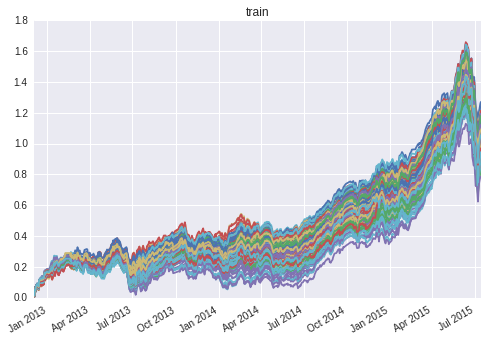

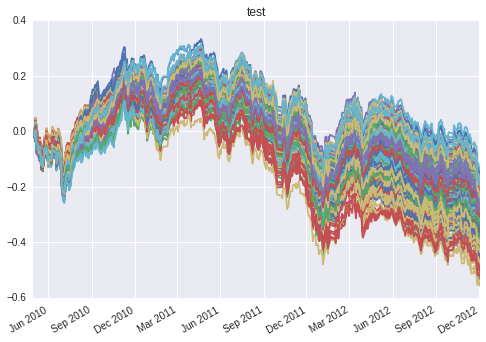

In [27]:
# Step 4: compute In-sample & Out-of-sample performance measure, like Sharpe ratio here
#for each c in cs
c_ = cs[69] # last training set 
train_set = pd.concat([m_part[idx] for idx in c_])# combined by (5, 6, 7, 8)
test_set = pd.concat([m_part[idx] for idx in all_partition if idx not in c_])# combined by (1, 2, 3, 4);
train_set.cumsum().plot(legend=False, title='train')
test_set.cumsum().plot(legend=False, title='test')

In [28]:
def mySharpeRatio(return_series, rf=0):
    return (np.mean(return_series)-rf)/np.std(return_series)

$\text{Let } ret_f: \text{ risk-free rate} $
$$\text{Sharp ratio} = \frac{mean(ret) - ret_f}{ std(ret)}$$
<p>That is, how much return I can get if I take 1 unit of risk in the form of standard deviation</p>
The higher the better.

In [29]:
#compute in-sample SR & out-of-sample SR (or any other measure)
is_perf = train_set.apply(mySharpeRatio, axis=0)
oos_perf = test_set.apply(mySharpeRatio, axis=0)
is_perf

Strategy0     0.100722
Strategy1     0.096813
Strategy2     0.102620
Strategy3     0.110680
Strategy4     0.106107
Strategy5     0.102580
Strategy6     0.110388
Strategy7     0.111233
Strategy8     0.107413
Strategy9     0.102521
Strategy10    0.089867
Strategy11    0.094699
Strategy12    0.100903
Strategy13    0.093114
Strategy14    0.112611
...
Strategy345    0.117934
Strategy346    0.103429
Strategy347    0.102183
Strategy348    0.113447
Strategy349    0.104410
Strategy350    0.090307
Strategy351    0.106456
Strategy352    0.105158
Strategy353    0.091435
Strategy354    0.106150
Strategy355    0.117035
Strategy356    0.103892
Strategy357    0.112876
Strategy358    0.109310
Strategy359    0.103197
Length: 360, dtype: float64

In [30]:
# find the strategy that is optimal in-sample, and its corresponding OOS SR.
best_is_strategy = np.argmax(is_perf)
best_oos_strategy = np.argmax(oos_perf)
print """
[best in-sample strategy] %s
[in-sample SR] %s
[out-of-sample SR] %s
""" % (best_is_strategy, is_perf[best_is_strategy], oos_perf[best_is_strategy])


[best in-sample strategy] Strategy108
[in-sample SR] 0.126201264528
[out-of-sample SR] -0.0257188674627



In [31]:
# get the relative rank r_bar of OOS SR
is_rank = is_perf.argsort().argsort()
oos_rank = oos_perf.argsort().argsort()# rank the 
rel_oos_rank = oos_rank/ float(len(oos_rank))

print """
[best in-sample strategy] %s
[rank of in-sample SR] %s
[rank of out-of-sample SR] %s
[relative rank of out-of-sample SR] %s
""" % (best_is_strategy, is_rank[best_is_strategy], oos_rank[best_is_strategy], rel_oos_rank[best_is_strategy])


[best in-sample strategy] Strategy108
[rank of in-sample SR] 359
[rank of out-of-sample SR] 299
[relative rank of out-of-sample SR] 0.830555555556



Let $r = \frac{rank_{oos}}{N}$ be the relative rank
$$\lambda_c  = \ln(\frac{r}{1-r})$$

In [32]:
# compute the logit lambda_c = ln(r_bar/ 1- r_bar)
rel_oos_rank_for_best_is_strategy = rel_oos_rank[best_is_strategy]
lambda_ = np.log(rel_oos_rank_for_best_is_strategy / (1-rel_oos_rank_for_best_is_strategy))
print lambda_
print 'This trial is ' + ('very' if lambda_ < 0 else 'less' ) +  ' likely to be backtest overfitting' 

1.58956970922
This trial is less likely to be backtest overfitting


What does "$\lambda_c$ < 0 " mean?
$$\lambda_c  = \ln(\frac{r}{1-r}) < 0 \\
\Rightarrow \frac{r}{1-r} < 1 \\
\Rightarrow r < 1 - r  \\
\Rightarrow r < \frac{1}{2}  \\
\Rightarrow rank_{oos} < \frac{N}{2}  \\
\text{That is, } rank_{oos} \text{ of best in-sample strategy is worse than the median of all } rank_{oos}\\
\Rightarrow \text{ match the definition of Backtest Overfitting }$$


In [33]:
# Step 4: Repeat this loop for all the combination training set
def get_overfitting_statistics(c_):
    train_set = pd.concat([m_part[idx] for idx in c_])
    test_set = pd.concat([m_part[idx] for idx in all_partition if idx not in c_])
    
    #compute in-sample SR & out-of-sample SR (or any other measure)
    is_perf = train_set.apply(mySharpeRatio, axis=0)
    oos_perf = test_set.apply(mySharpeRatio, axis=0)
    
    # find the strategy that is optimal in-sample, and its corresponding OOS SR.
    best_is_strategy = np.argmax(is_perf)
    best_oos_strategy = np.argmax(oos_perf)
    
    # get the relative rank r_bar of OOS SR
    oos_rank = oos_perf.argsort().argsort()# rank the 
    rel_oos_rank = oos_rank/ float(len(oos_rank))
    
    #compute the logit lambda_c = ln(r_bar/ 1- r_bar )
    rel_oos_rank_for_best_is_strategy = rel_oos_rank[best_is_strategy]
    lambda_ = np.log(rel_oos_rank_for_best_is_strategy / (1-rel_oos_rank_for_best_is_strategy))
    return {
        'is_perf': is_perf[best_is_strategy], 
        'oos_perf':oos_perf[best_is_strategy], 
        'oos_rank': oos_rank[best_is_strategy],  
        'logit':lambda_
    }

In [34]:
# run all the combination of training & testing set
df = pd.DataFrame([get_overfitting_statistics(c_) for c_ in cs])
df.head()

,is_perf,logit,oos_perf,oos_rank
0,-0.014934,3.784190,0.119389,352
1,0.029621,-0.200671,0.062785,162
2,0.024712,3.555348,0.081576,350
3,0.046947,3.004517,0.061429,343
4,0.054797,-1.847973,0.034726,49


[Probability of Backtest Overfitting] 0.385714285714 


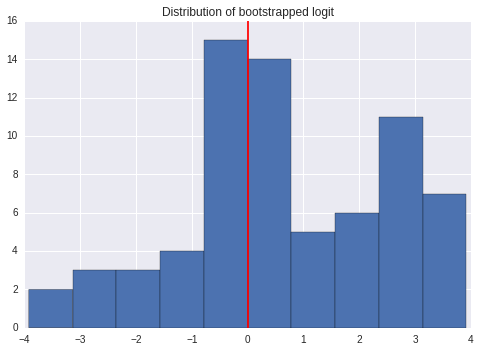

In [36]:
# Step 5: define relative frequency
# topic: probability of backtest overfitting
df.logit.replace([np.inf, -np.inf], np.nan).dropna().hist(bins=10)#title='Distribution of logit'
plt.axvline(0, color='red')
plt.title('Distribution of bootstrapped logit')
pbo = sum(df.logit < 0)/float(len(df.logit))
print "[Probability of Backtest Overfitting] %s " % pbo

### Step 6: hypothesis test
* $H_0$: the strategy selection process is backtest overfitting
* $\lambda_c$ ~ asymtopic Normal distribution
* PBO < 0.05, reject the $H_0$

## Other tools to evaluate backtest overfitting by the CSCV
1. Probability of backtest overfitting
2. Performance degradation
3. Probability of Loss
4. Stochastic dominance

[Probability of loss] 0.128571428571


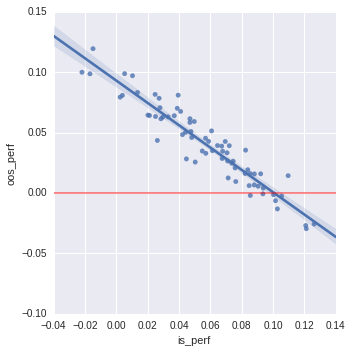

In [37]:
# topic: performance degradation & probability of loss
sns.lmplot("is_perf", "oos_perf", df) # negative slope
plt.axhline(0, color='red', alpha=0.5)

pl = sum(df.oos_perf < 0)/float(len(df.oos_perf))
print "[Probability of loss] %s" % pl

In [ ]:
# Topic: stochastic dominance
# does this strategy selection  process is better than random strategy selection